# Ejercicio 1


![ejercicio1](fig/ejercicio1.png)


En la figura se muestra un filtro sintonizado realizado con un inductor y un capacitor. El inductor tiene un $Q_{oL} = 50$ y suponga que el capacitor tiene $ESR\sim 0\Omega$. La fuente tiene una $P_{disp} = 500pW$ a $40MHz$. Se desea un $Q_c = 10$ para este circuito.

Para adaptar MTE con $Q_c = 10$ y el generador a $40MHz$:
1. Para máxima transferencia de energía a $Q$ constante, ¿ cual debe ser el valor de $R_L$?
2. Calcule $L_1$ 
3. Calcule $C_1$ .
4. Resistencia de perdidas paralelo $r_p$ del inductor
5. Calcule la impedancia de entrada del adaptador cargado a $f= 40 MHz$. 
6. La corriente pico del generador.
7. Calcule la potencia entrada al adaptador [dBm]
8. Calcule la potencia sobre la carga [dBm]
9. Perdidas del adaptador, valor porcentual.
10. Verificar utilizando simuladores.  


In [88]:
import numpy as np
from IPython.display import Image

Pdisp = 500e-12
Qc    = 10
Qo    = 50
fo    = 40e6
rg    = 50 


wo = 2*np.pi*fo

#1) 
RL = rg
print('1.1) RL= {:1.3f} ohms'.format(RL) )

#2) 
# Rext es la resistencia del generador y la carga en paralelo.
Rext = rg * RL / (rg + RL )

# Despejando L
L =  (1/Qc - 1/Qo)  * Rext / wo
print('1.2) L ={:2.2e} Hy'.format(L) ) 
#3) 
# Calculando C
C  =  1/ L / (wo)**2 
print('1.3) C ={:2.2e} F'.format(C) ) 

#4)
# La impedancia de entrada es la que "presenta" el circuito a la carga. 
rp =  Qo *(L * wo )
print('1.4) rp ={:2.2e} F'.format(rp) ) 

#5)
# la impedancia de entrada es el paralelo entre las perdidas 
#y la carga (en este caso).
Rin = RL * rp / (RL + rp)
#Informo resultados
print('1.5) Rin= {:2.2f} ohms'.format(Rin) ) 

#6)
igpico = ((Pdisp*8)/rg)**0.5
print('1.6) igpico =  {:1.3e} A'.format(igpico) )

#7)
R     = Rin*rg/(Rin+rg)
vin   = (igpico*R)
Pin   = vin**2/(2*Rin)
print('1.7) Pin =  {:1.3e} dBm ({:1.2e} W)'.format(10*np.log10(Pin/1e-3), Pin ) )

#8)
# Calculo potencia sobre la carga
PRL = Pdisp*((1-Qc/Qo)**2)
# tambien
PRL = vin**2/(2*RL)
print('1.8) PRL =  {:1.3e} dBm ({:1.2e} W)'.format(10*np.log10(PRL/1e-3), PRL ) )

#9)
perdida = PRL/Pin
print('1.9) Perdida = {:2.2f} %'.format(perdida*100) ) 

perdida =(1-Qc/Qo)**2
print('1.9) Perdida = {:2.2f} %'.format(perdida*100) ) 



1.1) RL= 50.000 ohms
1.2) L =7.96e-09 Hy
1.3) C =1.99e-09 F
1.4) rp =1.00e+02 F
1.5) Rin= 33.33 ohms
1.6) igpico =  8.944e-06 A
1.7) Pin =  -6.319e+01 dBm (4.80e-10 W)
1.8) PRL =  -6.495e+01 dBm (3.20e-10 W)
1.9) Perdida = 66.67 %
1.9) Perdida = 64.00 %


# Ejercicio 2



![ejercicio2](fig/ejercicio2.png)


El circuito amplificador transistorizado sintonizado, el cual corresponde a la etapa de salida.
El transistor presenta una impedancia de salida $y_{out} = 2500 \Omega - j 8000 \Omega$ a la frecuencia $f_o = 1 MHz$.  

La potencia disponible del transistor es de $P_{disp} = 100 mW$. 

La resistencia de carga es de $R_L = 100 \Omega$. 

Suponiendo que el capacitor de $C_1$ y el inductor $L_1$ tiene pérdidas despreciables.

Calcular para máxima transferencia de energía:
1. $L_1$
2. $C_1$ 
3. $Q_c$
4. $P_{R_L}$. Verificar utilizando simuladores.


El inductor $L_1$ disponible para el valor necesario presenta un factor de merito de $Q_o = 50$ a la frecuencia de trabajo.
5. El nuevo valor de $L_1$.
6. $C_1$ que sintoniza a $L_1$, tenga en cuenta la capacidad de salida del transistor. 
7. Nuevo $Q_c$.
8. $Z_{in}$ (la que se presenta a la resistencia del generador, incluyendo la capacidad de la salida del transistor, empleando los valores hallados en los puntos anteriores.  
9. $P_{R_L}$
10. Perdidas del adaptador. Verificar utilizando simuladores.


In [117]:
import numpy as np
from IPython.display import Image

fo    = 1e6
rg    = 2500 - 1j*8000
Pdisp = 100e-3
Rl    = 100
wo    = 2*np.pi*fo
Qo    = 50

#1) 
# conversion Rg
Qm1 = -rg.imag/rg.real

rgp = rg.real*(1+Qm1**2)

xgp = rg.imag*(1+1/Qm1**2)
cgp = 1/(xgp*wo)


# Conversion RL
Qm2 = ((rgp/Rl)-1)**0.5

Rlp = Rl*(1+Qm2**2)

xLs = Qm2*Rl  

Ls  = xLs/wo
print('1.1) L= {:1.3e} Hy'.format(Ls) )


#2) 
xLp = xLs*(1+1/Qm2**2)

xcp = xLp
cp  = xcp/wo
C   = cp-cgp

print('1.2) C ={:2.2e} F'.format(C) ) 

#3) 
rext = rgp*Rlp/(rgp+Rlp)
Qc   = rext/xLp
print('1.3) Qc ={:2.2f} (sin perdidas) '.format(Qc) ) 


#4)
PRl = Pdisp
print('1.4) PRL ={:2.2e} W'.format(PRl) ) 

#5)

# No cambia
print('1.5) L ={:2.2e} Hy'.format(Ls) ) 
#6) 
#no cambia
print('1.6) C ={:2.2e} F'.format(C) ) 

#7)

Qc = 1/(1/Qo+xLp/rext)

print('1.7) Qc ={:2.2f} (con perdidas) '.format(Qc) ) 

#8)

# La impedancia de entrada es la que "presenta" el circuito a la carga. 

rp  =  Qo *xLp 


# la impedancia de entrada es el paralelo entre las perdidas 
#y la carga (en este caso).
Rin = Rlp * rp / (Rlp + rp)

print('1.8) Zin ={:2.2f}  '.format(Rin) ) 



#9)

# Calculo potencia sobre la carga
PRL = Pdisp*((1-Qc/Qo)**2)


print('1.9) PRL =  {:1.2e} dBm ({:1.2e} W)'.format(10*np.log10(PRL/1e-3), PRL ) )

#10)


perdida =(1-Qc/Qo)**2
print('1.10) Perdida = {:2.2f} %'.format(perdida*100) ) 



1.1) L= 2.663e-04 Hy
1.2) C =2.67e-04 F
1.3) Qc =8.37 (sin perdidas) 
1.4) PRL =1.00e-01 W
1.5) L =2.66e-04 Hy
1.6) C =2.67e-04 F
1.7) Qc =7.17 (con perdidas) 
83964.80980574116
1.8) Zin =21053.99  
1.9) PRL =  1.87e+01 dBm (7.34e-02 W)
1.10) Perdida = 73.39 %


# Ejercicio 3



![ejercicio1](fig/ejercicio3.png)


Se desea acoplar una antena para transmitir una señal de $f_o = 650 MHz$. Dicha antena presenta a la frecuencia de transmisión una impedancia de $Z_{ant} = 120 \Omega + j 10 \Omega$

Se dispone para ello algunos los inductores que se muestran el siguiente figura:

<img src="fig/ejercicio3L.png" width="300">

La corriente máxima para estos inductores es de $I_{Lmax} = 300 mA$

El transmisor tiene una impedancia de salida de $Z_g = 50 \Omega$ y se busca que el adaptador minimice las reflexiones en la linea. 

En base a los valores de inductores diponibles, calcular:
1. $L1$ para la topoligia de capacitor en serie, inductor derivación. 
2. $C1$ para ese mismo circuito. Verificar empleando la carta de Smith. 
3. $r_p$ del inductor.
4. Impedancia de entrada del adaptador incluyendo a la antena y las perdidas de los componentes. Para el capacitor suponga un factor de merito de $Qo =200$.
4.  Máxima potencia en la antena para no sobrepasar el limite de corriente del inductor. 
5. $i_g$ pico para lograr la máxima potencia en la antena. 
6. $P_{disp}$ del generador para la corriente calculada. 
7. Perdidas de inserción del adaptador. 
8. Ancho de banda. 
9. Tension sobre el capacitor. 



In [161]:
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

# Datos 
Rl = 120 
Xl = 10
Zl = Rl + 1j*Xl
rg = 50
fo = 650e6
wo = 2*np.pi*fo


Qm   = Xl/Rl
Rlp  = Rl*(1+Qm**2)
Xlp  = Xl*(1+1/Qm**2)


Qm1  = (Rlp/rg-1)**0.5      # Qm para conversion de Rlp a rg

Xp   = Rlp/Qm1              # Caclulo de la reactancia paralelo
Xs   = Xp/(1+(1/Qm1**2))    # Conversion sustencia paralelo


# Alternativa 1 (Inductor paralelo, Capacitor serie)
# 1/Xp = 1/XL1+1/Xlp
XL1 = 1/(1/Xp-1/Xlp)
L1 = XL1/wo
C1 = 1/(Xs*wo)

# Alternativa 2 (capacitor paralelo, inductor serie)
# 1/XC2-1/Xl = 1/Xp

XC2 = 1/(1/Xp+1/Xlp)
C2  = 1/(XC2*wo)    
L2  = Xs/wo
# LTspice
print('.param L1 =  {:1.4f} nHy'.format(L1/1e-9) )
print('.param C1 =  {:1.4f} pF'.format(C1/1e-12) )

print('.param C2 =  {:1.4f} pF'.format(C2/1e-12) )
print('.param L2 =  {:1.4f} nHy'.format(L2/1e-9) )

print('.param Rl =  {:1.4e} '.format(Rl) )
print('.param rg =  {:1.4e} '.format(rg) )



#1) El de mayor Qo  
print('1.1) L1 ={:2.2e} Hy (derivación)'.format(L1) )  
#2)
print('1.2) C1 ={:2.2e} F (serie)'.format(C1) )  

#3)

Qo = 78

rp  =  Qo *wo*L1


print('1.3) rp ={:2.2f}  '.format(rp) ) 

#4)
# la impedancia de entrada es el paralelo entre las perdidas 
#y la carga (en este caso).
Qoc = 200
ZCs = 1/(Qoc*wo*C1) +1/(1j*wo*C1)
ZLp = (rp*(1j*wo*L1))/(rp+(1j*wo*L1))


Zin = ZCs + (Zl*ZLp)/(Zl+ZLp)
print('1.4) Zin ={:2.2f}  '.format(Zin) ) 

#5)
imax = 0.3

vomax = imax*ZLp

PRL = abs(vomax)**2/(2*Rlp)

print('1.5) PRL =  {:1.2e} dBm ({:1.2e} W)'.format(10*np.log10(PRL/1e-3), PRL ) )

#6)
#vi = ig*(rg*Zin)/(rg+Zin)

#vo  = vi*(1/Zin)*(ZLp*Zl)/(ZLp+Zl)

#PRL = vo**2/(2*Rlp)

#PRL =  (ig* ((rg*Zin)/(rg+Zin))* ((1/Zin)*(ZLp*Zl)/(ZLp+Zl)) )**2/(2*Rlp)

ig = (PRL*(2*Rlp))**0.5 / (((rg*Zin)/(rg+Zin))* ((1/Zin)*(ZLp*Zl)/(ZLp+Zl)))

print('1.6) igmax =  {:1.2e} dBm ({:1.2e} A)'.format(20*np.log10(ig.real/1e-3), ig.real ) )

#7)

Pdisp = abs(ig)**2*rg/8

print('1.7) Pdisp =  {:1.2e} dBm ({:1.2e} W)'.format(10*np.log10(Pdisp/1e-3), Pdisp ) )

#8)



perdidas = PRL/Pdisp

print('1.8) Perdida = {:2.2f} %'.format(perdida*100) ) 

#9)
vin = ig*(rg*Zin)/(rg+Zin)

Vcap = vin - vomax

print('1.9) Vcap = {:2.2f} V'.format(abs(Vcap) ) ) 




.param L1 =  26.7290 nHy
.param C1 =  4.1144 pF
.param C2 =  2.5807 pF
.param L2 =  14.5717 nHy
.param Rl =  1.2000e+02 
.param rg =  5.0000e+01 
1.1) L1 =2.67e-08 Hy (derivación)
1.2) C1 =4.11e-12 F (serie)
1.3) rp =8514.73  
1.4) Zin =50.41-0.70j  
1.5) PRL =  3.65e+01 dBm (4.44e+00 W)
1.6) igmax =  5.48e+01 dBm (5.47e-01 A)
1.7) Pdisp =  3.66e+01 dBm (4.53e+00 W)
1.8) Perdida = 73.39 %
1.9) Vcap = 50.94 V


# Ejercicio 4 

En aplicaciones como conexiones bluetooth, zigbee, ISM, WLAN, se necesitan antenas muy pequeñas para los sistemas de comunicaciones. El fabricante Johanson ofrece antenas de chip de RF en miniatura que se fabrican utilizando la tecnología de cerámica (LTCC). 
Estas antenas pueden ser montadas sobre el PCB.

En este ejemplo, vamos a realizar el diseño del adaptador para una antena de 2.4GHz.

https://www.johansontechnology.com/datasheets/2450AT45A100/2450AT45A100.pdf

En base a los datos informados por el fabricante,el modelo de la antena 

![ejercicio4PCB](fig/ejercicio4.png)

http://www.johansontechnology.com/tuning

El siguiete gráfico muestra la impedancia que presenta la antena. El diseño se realizo empleando QUCs (http://qucs.sourceforge.net/).

![ejercicio4PCB](fig/ejercicio4b.png)
![ejercicio4PCB](fig/ejercicio4a.png)

La impedancia de la antena a la frecuencia de trabajo $f_o = 2.4 GHz$ es $Z_{ant}(2.4GHz) = (64-42.7j)\Omega$


1. En base al adaptador propuesto por el fabricante, calcular el valor del inductor $L$

2. Calcular $C$

3. Calcular la impedancia de entrada para los valores propuestos.

4. Proponga el inductor necesario en base a los inductores propuestos en la guia de selección, el footprint debe ser $0402$.Indicar el codigo del componente.
https://www.johansontechnology.com/downloads/jti-cat-rf-ind.pdf

5. En base a la hoja de datos, indicar el factor de merito $Q_o$ del inductor a la frecuencia de trabajo $f_o$

6. Proponga el capacitor necesario en base a los capacitores propuestos en la guia de selección, el footprint debe ser $0402$. Indicar el codigo del componente.
https://www.johansontechnology.com/downloads/catalog/johanson-technology-multi-layer-high-q-capacitors.pdf

7. En base a la hoja de datos, indicar el factor de merito $Q_o$ del capacitor a la frecuencia de trabajo $f_o$.

8. 7. Calcular la impedancia de entrada empleando los componentes propuestos, tenga en cuenta las perdidas de los componentes. 

9. Calcular la maxima potenicia que se puede entragar a la  antena,en base a los valores maximos de los componentes. 

10. Calcular la potencia disponible de la fuente para lograr la maxima potencia en la antena.




2400000000.0
(64.01021469793311-42.7692865068966j)


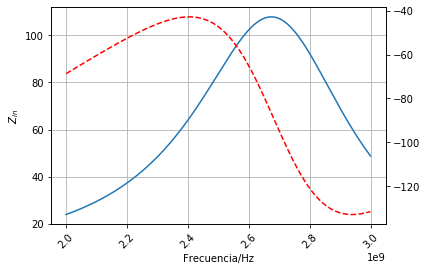

(50.84043753845235+1.8600019951712454j)


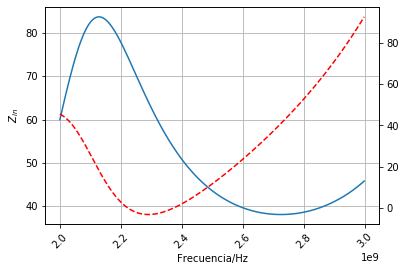

wo= 1.5080e+10
Ra= 6.4010e+01
Ca= 1.5505e-12
Qm1= 6.68e-01
Rap= 9.2587e+01 ohms
Cap= 4.7857e-13 F
La= 9.1892e-09 Hy
Qm2= 9.2290e-01
Lb= 6.6528e-09 Hy
Lp 3.8590e-09 Hy
Lbs 3.0601e-09 Hy
Cs= 1.4371e-12 F


In [162]:
import myplot as myp
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

RLa = dict()

freq = np.array([2305e6,2440e6, 2635e6])
RLa  = np.array([-10.051,-13.020,-10.157])

G      = 10**(RLa/10)  
Z      = 50*(1+G)/(1-G)
GG     = (Z-50)/(Z+50)
RR     = 10*np.log10(GG)



Rant  = 90
Lant  = 23e-9
Cants = 0.2e-12
Cantp = 0.6e-12

f =  np.arange(2e9,3e9,1e6)                   # Defino el array de frecuencia
w =  2*np.pi*f
wo = 2.4e9*2*np.pi
print(f[400])


Zants = (Rant + 1j*w*Lant+ 1/(1j*w*Cants) )
Zant  = 1/(1j*w*Cantp + 1/Zants)



Gant = (Zant - 50)/(Zant+50)
RLant = 10*np.log10(Gant)

print(Zant[400])
myp.PlotCpx(f,Zant , labelx = 'Frecuencia/Hz', labely = '$Z_{in}$')
plt.show()

Lad  = 3.9e-9  
QLa  = 50e9
ZLad = 1j*w*Lad + w*Lad/QLa

Cad  = 1.5e-12
QCa  = 150e9
rsCa = 1/(QCa*w*Cad)
XCa  = 1/(1j*w*Cad) 
ZCad = XCa + rsCa

Zi = 1/(1/(ZLad) + 1/(Zant)) + ZCad
print(Zi[400])
myp.PlotCpx(f,Zi , labelx = 'Frecuencia/Hz', labely = '$Z_{in}$')
plt.show()


print('wo= {:1.4e}'.format(wo) )
Zo = 50
Ra = Zant[400].real
Ca = -1/(Zant[400].imag*wo)

print('Ra= {:1.4e}'.format(Ra) )
print('Ca= {:1.4e}'.format(Ca) )

Qm1 = 1/(Ra*wo*Ca)
print('Qm1= {:1.2e}'.format(Qm1) )


Rap = Ra*(1+Qm1**2)
Cap = Ca/(1+1/Qm1**2)
print('Rap= {:1.4e} ohms'.format(Rap) )
print('Cap= {:1.4e} F'.format(Cap) )


La = 1/(Cap*wo**2)
print('La= {:1.4e} Hy'.format(La) )

Qm2 = (Rap/Zo - 1)**0.5
print('Qm2= {:1.4e}'.format(Qm2) )


Lb = Rap/(wo*Qm2)
print('Lb= {:1.4e} Hy'.format(Lb) )

Lp = La*Lb/(La+Lb)
print('Lp {:1.4e} Hy'.format(Lp) )

Lbs = Lb/(1+1/Qm2**2)
print('Lbs {:1.4e} Hy'.format(Lbs) )
Cs  = 1/(Lbs*wo**2)
print('Cs= {:1.4e} F'.format(Cs) )

 

# Ejercicio 5 filtro PI




El siguiente ejercicio tiene como objetivo realizar el calculo de los los adaptadores para un amplificador de $150 W$ de potencia de RF a la frecuencia de $f_o = 100 MHz$. 

Para este amplificador vamos a emplear el MOSFET BLF177 fabricado por la empresa Ampleon.

Este dispositivo fue diseñado como dispotivo activo solido para amplificador de potencia para servicios comerciales como FM o TV.


Se emplea como base el diseño propouesto en la hojas de datos, el cual se muestra a continuación. 
https://www.ampleon.com/documents/data-sheet/BLF177_N.pdf

El diseño se basa en la recomiendación de la nota de aplicación AN282 de Motorola (NXP) disponible en internet : https://www.nxp.com/docs/en/application-note/AN282A.pdf 
 
Tambien se puede consultar: https://www.nxp.com/docs/en/application-note/AN1526.pdf 
 
Principio de funcionamiento.

Los amplificador sintonizados operan con señales periodicas con un ancho de banda asociado. Tipicamente, se utilizan para amplificar una señal portadora modulada. 

Para ilustrar el funcionamiento, supongamos que empleamos como exitación un tono de señal portadora, en este ejemplo sera de $f_o = 100 MHz$. 
El amplificador esta diseñado para operar en Clase AB, Clase B o Clase C, dependiendo del ángulo de circulación de la señal a la salida. 
Por ejemplo, suponiendo que el amplificador opera en Clase B, los pulsos de corriente de la fuente de salida corresponderan unicamente a parte positiva de la entrada (angulo de circulación de 180 grados).
Estos pulsos de corrientes tiene un espectro en frecuencia conformado principalmente por una señal fundamental de $100 MHz$ y sus armonicos. 
Si logramos atenuar los armonicos que conforman el pulso de corriente, obtenemos nuevamente la señal fundamental. Esto se logra empleando filtros LC.
La reduccuión del angulo de circulación mejora el rendimiento pero al mismo tiempo produce armonicos de mayor intensidad que deben ser atenuados para recomponener la señal portadora modulada. Esto exige filtros de salida mas selectivos. 


Los MOSFET para el el amplificador que estamos proyectando deben operar en cirtos margenes de tensión.
Para este transistor, $V_{DSmin} \ge 10 V$ y $V_{(BR)DSS} \ge 125 V$. 
Dado que se busca una señal alterna a la salida del transistor, la tensión de DC del DRAIN permite la excursión de la señal alterna de $f_o = 100 MHz$, desde $V_{DD}$ (tensión de la fuente) hasta $V_{DSMIN}$. Esta excursión de la señal se logra conectando a la fuente de corriente $g_{ds}$ una resistencia de valor adecuado. 
Entonces, los pulsos de corriente producen sobre la resistencia una señal alterna de tensión a la frecuencia de sintonia. Cuando la fuente no entregue corriente (semiciclo negativo de la señal de entrada), es  el circuito resonador el que mantiene la osciladción a la frecuencia de resonancia. 

En este proyecto, la tensión de fuente en el DRAIN es de $V_{DD} = 50 V$.


La resistencia total con que se debe cargar a la fuente $g_{ds}$ entonces se calcula como:

$$Rt = \frac{(V_{DD})^2}{2 P_o}$$

Recordemos que estamos proyectando un amplificador de $P_o = 150 Watt$ (RMS). 

$$Rt  = 8.3 \Omega$$

Dado que el MOSFET presenta una capacidad, esta resistencia se emplea para frecuencias bajas (donde la capacidad de salida sea despreciable). Para frecuencias mayores, esta resistencia debe ser menor para compensar los efectos de la capacidad.

![ejercicio5impedancias](fig/ejercicio5c.png)

De la hoja de datos podemos obtener la impedancia de entrada y de salida del amplificador que debemos presentarle al MOSFET a la frecuencia de trabajo. Dada la alta frecuencia este valor difiere del calculado debido a las capacidades del dispositivo. 

A la frecuencia de trabajo $f_o = 100 MHz$

$$Z_{in} = (1.5 - 2j) \Omega$$ 

$$Z_{L}  = (3.1 + 3.5j) \Omega$$ 


Para este diseño empleamos el circuito propuesto por el fabricante, el cual se muestra a continuación. En el circuito se identificaron los filtros que debemos calcular.

![ejercicio5circuito](fig/ejercicio5d.png)

Según se especifica en la hoja de datos, se deben emplear striplines (lineas de trasmisión que se asemejan a un indictor) a la entrada y a la salida del MOSFET. Estos inductores se midieron en el pograma de simulaciones QUCs. Para el calculo se emplea el sustratro ROGER R5880. A continuación se mustra el resultado:

![ejercicio5stripline](fig/ejercicio5e.png)

$$Z_{in} = (1.475 - 441.4j) \Omega$$ 


$$Z_{L}  = (1.87 + 847.3j) \Omega$$ 

Notar que se empleo en el caso de la salida la impedancia compleja. 

Valores de los componentes:


$$C6, C7, C9, C10 = 1 nF (Cap.acople)$$ 


Adaptador entrada:

$$C1 = C2 = 2 a 20 pF(Trimmer\ variable)$$

$$C3 = 20 pF$$

$$C4 = C5 = 62 pF$$

$$L1 = 22 nHy$$


Filtro salida:

$$C13 = C14 =  36 pF$$

$$C15 = 12 pF$$

$$C16 = C18 = 2 a 20 pF(Trimmer\ variable)$$

$$L8  = 34.4nHy$$

Calcular.

1. Del adaptador de entrada $C1$ para la frecuecia de $fo= 100MHz$$

2. Del adaptador de entrada $C2$ para la frecuecia de $fo= 100MHz$$, Verificar usando simuladores.

3. Del filtro de entrada $C16$ para la frecuecia de $fo= 100MHz$$

4. Del filtro de entrada $C18$ para la frecuecia de $fo= 100MHz$$, Verificar usando simuladores.

5. Suponiendo que el pico de la señal altena de en el Drain es de $V_{DS}(100MHz) = 50 V$, calcular la tensión en $R_L = 50 \Omega$. Verificar usando simuladores.

6. Suponiendo que el pico de la señal altena de en el Drain es de $V_{DS}(100MHz) = 50 V$, calcular la potencia en $R_L = 50 \Omega$

7. Suponiendo que la impedancia de entrada necesaria es la misma para $f = 80MHz$, cual deben ser el nuevo valor de $C1$

8. Suponiendo que la impedancia de entrada necesaria es la misma para $f = 80MHz$, cual deben ser el nuevo valor de $C2$. Verificar usando simuladores.

9. Suponiendo que la impedancia de salida necesaria es la misma para $f = 80MHz$, cual deben ser el nuevo valor de $C16$

10. Suponiendo que la impedancia de salida necesaria es la misma para $f = 80MHz$, cual deben ser el nuevo valor de $C18$. Verificar usando simuladores.



In [86]:
import math
import cmath 
import numpy as np
import matplotlib.pyplot as plt
from skrf import Network, Frequency
import mysmith as mys
import myplot as myp


  

    
MRF173 = Network('./POWER_RF_prj/MRF173.s2p')

freq = Frequency(130,170,5,'mhz')

fo = np.arange(130e6,170e6,10e6)
wo = 2*np.pi*fo

Y1 = MRF173['{}Mhz'.format(150)].y[0]

y11 =   Y1[0,0]
y12 =   Y1[0,1]
y21 =   Y1[1,0]
y22 =   Y1[1,1]
 
yin  = y11 - (y21*y12)/(y22+yl)
yg   = y11.real  -  1j*y11.imag    



yout = y22 - (y21*y12)/(y11+yg)



wo = 2*np.pi*150e6

Rt = (50)**2/(2*150)
print('Rt= {:2.2f}'.format(Rt))

Zod  = 2.68 - 1.3j  
Zid  = 2.99 - 1.45j

rg   = 1/(Zod.real)
cgp  = -1/((Zod.imag) * wo)



rgp  = 1/(1/Zod).real
cgp  = (1/Zod).imag / wo

Loa  = 11e-9
XLoa = wo*Loa
print('Xoa= {:2.2f}'.format(XLoa))
Zoa  = Zod + 1j*XLoa
Yoa  = 1/Zoa
Roa  = 1/Yoa.real 
print('Roa= {:2.2f}'.format(1/Yoa.real))
print('Xoa= {:2.2f}'.format(1/Yoa.imag))

Rl = 1/(1/Rt-1/Roa)
print('Rl= {:2.2f}'.format(Rl))

Yl = -Yoa.imag  

Cl  = Yl/wo 
print('Cl= {:2.2e}'.format(Cl))




print('.param rg  = {:2.2e}'.format(rg))
print('.param cg  = {:2.2e}'.format(cg))
print('.param rgp  = {:2.2e}'.format(rgp))
print('.param cgp  = {:2.2e}'.format(cgp))
print('.param Loa = {:2.2e}'.format(Loa))

print('.param Rl = {:2.2e}'.format(Rl))
print('.param Cl = {:2.2e}'.format(Cl))

print('.param Ls = {:2.2e}'.format(Ls))
print('.param Cs = {:2.2e}'.format(Cs))



print(1/(3.5*2*np.pi*100e6))


Rt= 8.33
Xoa= 10.37
Roa= 33.36
Xoa= -9.86
Rl= 11.11
Cl= 1.08e-10
.param rg  = 3.73e-01
.param cg  = 8.16e-10
.param rgp  = 3.31e+00
.param cgp  = 1.55e-10
.param Loa = 1.10e-08
.param Rl = 1.11e+01
.param Cl = 1.08e-10
.param Ls = 1.00e-07
.param Cs = 1.13e-11
4.547284088339867e-10
